**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio **1** de la *parte 1* del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio **2** de la *parte 1* del entregable imputaron los valores faltantes de la columna `CouncilArea` y las columnas obtenidas a partir del conjunto de datos de **AirBnB**.

En esta notebook, **se utilizarán los resultados de dichas operaciones**.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

seaborn.set_context('talk')

In [2]:
melb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df = pandas.read_csv('DataSet/curated_dataset.csv')

df.head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,Lattitude,Longtitude,Regionname,Propertycount,zipcode,bnb_price_mean,bnb_latitude_mean,bnb_longitude_mean,bnb_city_mode,bnb_suburb_mode
0,Abbotsford,2,h,1480000.0,S,Biggin,2016Q1,2.5,3067.0,1.0,...,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,120.082677,-37.806091,145.000977,Yarra,Abbotsford
1,Abbotsford,2,h,1035000.0,S,Biggin,2016Q2,2.5,3067.0,1.0,...,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,120.082677,-37.806091,145.000977,Yarra,Abbotsford
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017Q2,2.5,3067.0,2.0,...,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,120.082677,-37.806091,145.000977,Yarra,Abbotsford


#### Eliminamos las variables `SellerG`, `Suburb`,  y `bnb_suburb_mode`

Lamentablemente no contamos con los recursos necesarios para correr **KNN** sobre nuestro conjunto de datos entero.
Por lo tanto se tomó la decisión de eliminar las variables categóricas que poseen la mayor cantidad de categorías, en un intento por reducir la dimensionalidad de la matriz resultante (luego de aplicar el *encoding*); y poder de esta manera, continuar con la curación de los datos.

In [4]:
df.Suburb.nunique()

314

In [5]:
df.bnb_suburb_mode.nunique()

191

In [6]:
df.SellerG.nunique()

191

In [7]:
df = df.drop(['SellerG', 'Suburb', 'bnb_suburb_mode'], axis=1)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la *parte 1* del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación *One-hot encoding* a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas, y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de *numpy* subyacente a un *DataFrame*.

In [8]:
df.shape

(13580, 20)

In [9]:
feature_dict = list(df.T.to_dict().values())

feature_dict[0]

{'Rooms': 2,
 'Type': 'h',
 'Price': 1480000.0,
 'Method': 'S',
 'Date': '2016Q1',
 'Distance': 2.5,
 'Postcode': 3067.0,
 'Bathroom': 1.0,
 'Car': 1.0,
 'Landsize': 202.0,
 'CouncilArea': 'Yarra',
 'Lattitude': -37.7996,
 'Longtitude': 144.9984,
 'Regionname': 'Northern Metropolitan',
 'Propertycount': 4019.0,
 'zipcode': 3067.0,
 'bnb_price_mean': 120.08267716535433,
 'bnb_latitude_mean': -37.80609081153544,
 'bnb_longitude_mean': 145.00097749448815,
 'bnb_city_mode': 'Yarra'}

In [10]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [11]:
feature_matrix

<13580x99 sparse matrix of type '<class 'numpy.float64'>'
	with 271600 stored elements in Compressed Sparse Row format>

De las **99** columnas...

- **3** son por `Type`.
- **5** son por `Method`.
- **6** son por `Regionname`.
- **8** son por `Date`.
- **30** son por `bnb_city_mode`.
- **33** son por `CouncilArea`.

Y el resto (**14**) son por las variables numéricas `Rooms`, `Price`, `Distance`, `Postcode`, `Bathroom`, `Car`, `Landsize`, `Lattitude`, `Longitude`, `Propertycount`, `zipcode`, `bnb_price_mean`, `bnb_latitude_mean`, `bnb_longitude_mean`.

#### Reconstruimos el Data Frame

In [12]:
# Calculamos el tamaño estimado de la matriz densa.
size_MB = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("La matriz DENSA ocupará aproximadamente {:.2f} MB".format(size_MB))

La matriz DENSA ocupará aproximadamente 5.13 MB


In [13]:
precision_type = numpy.float32

dense_feature_matrix = feature_matrix.astype(precision_type).todense()

print("Tamaño: {:.2f} MB".format(dense_feature_matrix.nbytes / 1024 / 1024))

Tamaño: 5.13 MB


In [14]:
encoded_df = pandas.DataFrame(data=dense_feature_matrix, columns=vec.get_feature_names())

encoded_df.head(3)

,Bathroom,Car,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,...,bnb_city_mode=Stonnington,bnb_city_mode=Whitehorse,bnb_city_mode=Whittlesea,bnb_city_mode=Wyndham,bnb_city_mode=Yarra,bnb_city_mode=Yarra Ranges,bnb_latitude_mean,bnb_longitude_mean,bnb_price_mean,zipcode
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-37.806091,145.000977,120.08268,3067.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-37.806091,145.000977,120.08268,3067.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-37.806091,145.000977,120.08268,3067.0


In [15]:
encoded_df.shape

(13580, 99)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [16]:
relevant_cols = ['BuildingArea', 'YearBuilt']

In [17]:
join_df = encoded_df.join(melb_df[relevant_cols], how='left')

join_df.head(3)

,Bathroom,Car,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,...,bnb_city_mode=Whittlesea,bnb_city_mode=Wyndham,bnb_city_mode=Yarra,bnb_city_mode=Yarra Ranges,bnb_latitude_mean,bnb_longitude_mean,bnb_price_mean,zipcode,BuildingArea,YearBuilt
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-37.806091,145.000977,120.08268,3067.0,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-37.806091,145.000977,120.08268,3067.0,79.0,1900.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-37.806091,145.000977,120.08268,3067.0,150.0,1900.0


**Observaciones**

[Why is scaling required in KNN and K-Means?](https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7)

**KNN** and **K-Means** are one of the most commonly and widely used machine learning algorithms.
**KNN** is a supervised learning algorithm and can be used to solve both classification as well as regression problems.
**K-Means**, on the other hand, is an unsupervised learning algorithm which is widely used to cluster data into different groups.
One thing which is common in both these algorithms is that both **KNN** and **K-Means** are distance based algorithms.
**KNN** chooses the *k* closest neighbors and then based on these neighbors, assigns a class (for classification problems) or predicts a value (for regression problems) for a new observation.
**K-Means** clusters the similar points together.
The similarity here is defined by the distance between the points.
Lesser the distance between the points, more is the similarity and vice versa.

[K-Nearest Neighbors](https://towardsdatascience.com/k-nearest-neighbors-94395f445221)

**KNN** can be very sensitive to the scale of data as it relies on computing the distances.
For features with a higher scale, the calculated distances can be very high and might produce poor results.
It is thus advised to scale the data before running the **KNN**.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_matrix = scaler.fit_transform(join_df)

scaled_df = pandas.DataFrame(data=scaled_matrix, columns=join_df.columns)

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

In [20]:
# Solo las variables 'BuildingArea' y 'YearBuilt' del DF.
mice_df = scaled_df.copy(deep=True)

mice_df[relevant_cols] = mice_imputer.fit_transform(mice_df[relevant_cols])

/home/mgobbi289/miniconda3/envs/diplodatos-aycd/lib/python3.9/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


La *advertencia* se produce porque el algoritmo no llega a convergir con la cantidad máxima de iteraciones.
Al graficar será evidente esta situación.

In [21]:
# Todas las variables del DF.
full_mice_df = scaled_df.sample(4000, random_state=123).copy(deep=True)

full_mice_df[:] = mice_imputer.fit_transform(full_mice_df)

/home/mgobbi289/miniconda3/envs/diplodatos-aycd/lib/python3.9/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

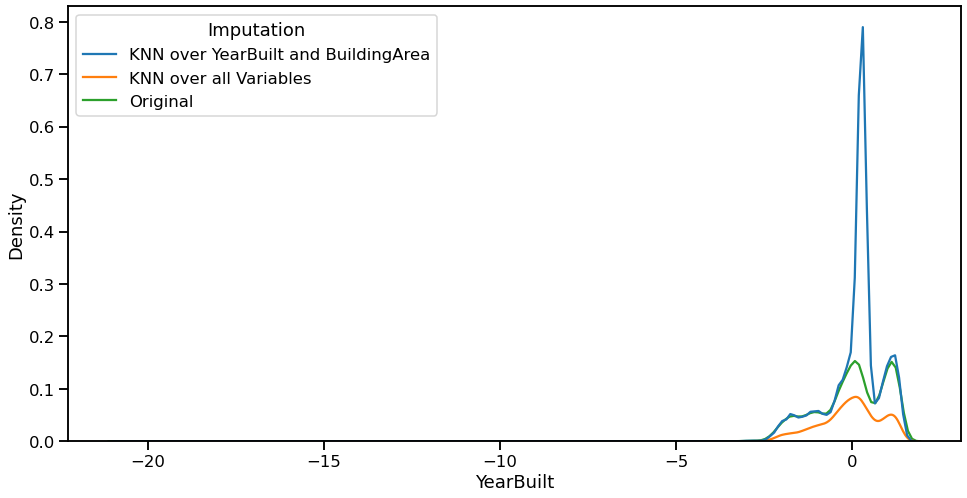

In [22]:
mice_year_built = mice_df.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'

full_mice_year_built = full_mice_df.YearBuilt.to_frame()
full_mice_year_built['Imputation'] = 'KNN over all Variables'

melb_year_built = scaled_df.YearBuilt.dropna().to_frame()
melb_year_built['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, full_mice_year_built, melb_year_built])

fig = plt.figure(figsize=(16, 8))
seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation');

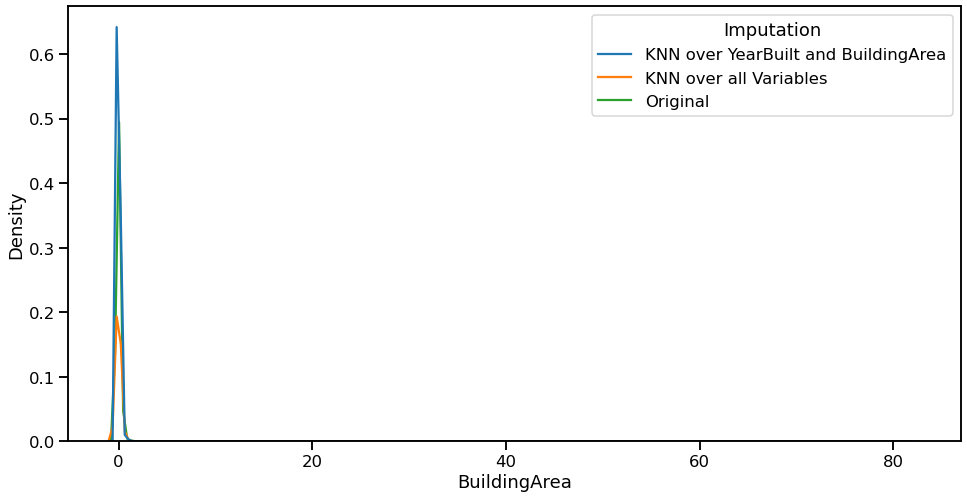

In [23]:
mice_building_area = mice_df.BuildingArea.to_frame()
mice_building_area['Imputation'] = 'KNN over YearBuilt and BuildingArea'

full_mice_building_area = full_mice_df.BuildingArea.to_frame()
full_mice_building_area['Imputation'] = 'KNN over all Variables'

melb_building_area = scaled_df.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Original'

data = pandas.concat([mice_building_area, full_mice_building_area, melb_building_area])

fig = plt.figure(figsize=(16, 8))
seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation');

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

**Observaciones**

[Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

While many algorithms (such as *SVM*, *K-nearest neighbors*, and *logistic regression*) require features to be normalized, intuitively we can think of *Principle Component Analysis* (**PCA**) as being a prime example of when normalization is important.
In **PCA** we are interested in the components that maximize the variance.
If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), **PCA** might determine that the direction of maximal variance more closely corresponds with the `weight` axis, if those features are not scaled.
As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

In [24]:
from sklearn.decomposition import PCA

n = 20

pca = PCA(n_components=n)

pca.fit(full_mice_df)

pca.components_.shape

(20, 101)

In [26]:
print('Explained variance ratio')

accum_var = 0
for i, var in enumerate(pca.explained_variance_ratio_):
    accum_var += var
    print(f'Component {i + 1:2} | VarRatio {var:.3f} | Accum VarRatio {accum_var:.3f}')

Explained variance ratio
Component  1 | VarRatio 0.069 | Accum VarRatio 0.069
Component  2 | VarRatio 0.047 | Accum VarRatio 0.117
Component  3 | VarRatio 0.043 | Accum VarRatio 0.160
Component  4 | VarRatio 0.035 | Accum VarRatio 0.195
Component  5 | VarRatio 0.034 | Accum VarRatio 0.229
Component  6 | VarRatio 0.031 | Accum VarRatio 0.259
Component  7 | VarRatio 0.029 | Accum VarRatio 0.288
Component  8 | VarRatio 0.027 | Accum VarRatio 0.315
Component  9 | VarRatio 0.025 | Accum VarRatio 0.339
Component 10 | VarRatio 0.023 | Accum VarRatio 0.363
Component 11 | VarRatio 0.023 | Accum VarRatio 0.386
Component 12 | VarRatio 0.022 | Accum VarRatio 0.408
Component 13 | VarRatio 0.022 | Accum VarRatio 0.430
Component 14 | VarRatio 0.022 | Accum VarRatio 0.452
Component 15 | VarRatio 0.022 | Accum VarRatio 0.473
Component 16 | VarRatio 0.021 | Accum VarRatio 0.495
Component 17 | VarRatio 0.021 | Accum VarRatio 0.516
Component 18 | VarRatio 0.021 | Accum VarRatio 0.536
Component 19 | VarRat

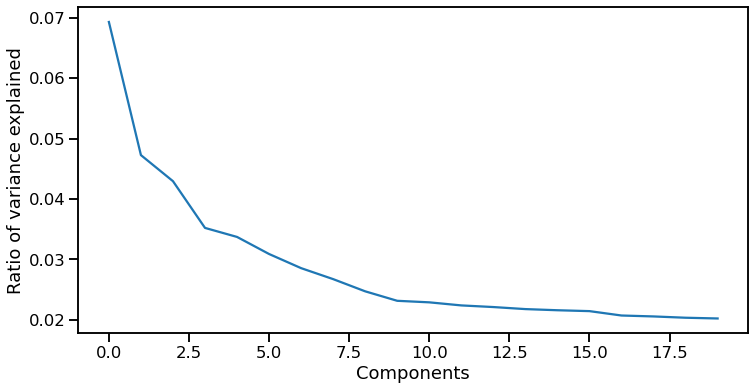

In [27]:
fig = plt.figure(figsize=(12, 6))

seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_
                )

plt.xlabel('Components');
plt.ylabel('Ratio of variance explained');

#### Reducción de dimensionalidad con *PCA*

In [28]:
proyected_features = pca.transform(full_mice_df)

proyected_features.shape

(4000, 20)

In [29]:
# Copiamos nuestro dataset
pca_df = full_mice_df.copy()

Ya que queremos conservar la mayor cantidad de información, y nuestro conjunto de datos no es demasiado pesado, vamos a almacenar los $n$ **componentes principales** en nuestro *dataset*.

In [30]:
pca_columns = ['pca{}'.format(i + 1) for i in range(pca.n_components)]

pca_df[pca_columns] = proyected_features

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [31]:
# Copiamos nuestro dataset
final_df = pca_df.copy()

In [32]:
final_df.shape

(4000, 121)

In [33]:
final_df.head(3)

,Bathroom,Car,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,...,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20
5799,-0.780235,-0.623608,-0.223486,-0.206229,-0.323286,-0.190383,-0.024279,-0.0583,-0.282854,-0.076495,...,-0.873079,0.468064,0.350118,-0.534763,-1.129464,-1.410520,-0.701851,3.060033,1.597732,-2.039517
10596,-0.780235,-0.623608,-0.223486,-0.206229,-0.323286,-0.190383,-0.024279,-0.0583,-0.282854,-0.076495,...,-3.542820,-2.701332,0.538301,0.847181,1.438971,1.523462,-1.682688,-0.319964,-0.984967,0.717050
7471,-0.780235,0.411040,-0.223486,-0.206229,-0.323286,-0.190383,-0.024279,-0.0583,-0.282854,-0.076495,...,-0.856396,-0.685023,-2.026651,-1.765125,-0.865607,0.311154,1.684561,1.615189,-0.234874,0.965121


In [34]:
final_df.to_csv('DataSet/final_dataset.csv', index=False)

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final.
Se debe incluir:

1. Criterios de exclusión (o inclusión) de filas
2. Interpretación de las columnas presentes
3. Todas las transformaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otros desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado.
Debe ser detallado pero consiso.
Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.

  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```